In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import joblib

In [2]:
df=pd.read_csv('realistic_kraljic_dataset.csv')
df

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
0,P001,Semiconductors,South America,81,171,255.03,5,5,4,Yes,Strategic
1,P002,Semiconductors,South America,8,763,380.33,5,4,4,Yes,Strategic
2,P003,Pharma APIs,Asia,65,413,385.24,4,5,5,Yes,Strategic
3,P004,Semiconductors,South America,70,882,287.64,5,5,5,Yes,Strategic
4,P005,Lithium Batteries,Asia,15,120,382.26,4,4,4,Yes,Strategic
...,...,...,...,...,...,...,...,...,...,...,...
995,P996,Printer Ink,Global,19,19648,10.20,2,1,1,No,Non-Critical
996,P997,Cleaning Supplies,Global,21,19143,15.30,1,2,1,No,Non-Critical
997,P998,Uniforms,Global,70,5352,30.23,1,3,2,No,Non-Critical
998,P999,Printer Ink,Global,44,18070,30.73,1,1,2,No,Non-Critical


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   object 
 1   Product_Name          1000 non-null   object 
 2   Supplier_Region       1000 non-null   object 
 3   Lead_Time_Days        1000 non-null   int64  
 4   Order_Volume_Units    1000 non-null   int64  
 5   Cost_per_Unit         1000 non-null   float64
 6   Supply_Risk_Score     1000 non-null   int64  
 7   Profit_Impact_Score   1000 non-null   int64  
 8   Environmental_Impact  1000 non-null   int64  
 9   Single_Source_Risk    1000 non-null   object 
 10  Kraljic_Category      1000 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


In [4]:
df.tail()

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
995,P996,Printer Ink,Global,19,19648,10.20,2,1,1,No,Non-Critical
996,P997,Cleaning Supplies,Global,21,19143,15.30,1,2,1,No,Non-Critical
997,P998,Uniforms,Global,70,5352,30.23,1,3,2,No,Non-Critical
998,P999,Printer Ink,Global,44,18070,30.73,1,1,2,No,Non-Critical
999,P1000,Cleaning Supplies,Global,76,9018,29.98,1,3,1,No,Non-Critical


In [5]:
df.columns

Index(['Product_ID', 'Product_Name', 'Supplier_Region', 'Lead_Time_Days',
       'Order_Volume_Units', 'Cost_per_Unit', 'Supply_Risk_Score',
       'Profit_Impact_Score', 'Environmental_Impact', 'Single_Source_Risk',
       'Kraljic_Category'],
      dtype='object')

In [6]:
df.describe()

,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,47.508000,4753.182000,169.390440,2.988000,3.024000,2.778000
std,23.630454,5625.105273,132.104809,1.537602,1.542661,1.392356
min,7.000000,50.000000,10.090000,1.000000,1.000000,1.000000
25%,27.000000,363.000000,50.460000,1.000000,2.000000,2.000000
50%,48.000000,1105.500000,130.640000,3.000000,3.000000,2.500000
75%,67.000000,8111.750000,255.165000,4.250000,5.000000,4.000000
max,89.000000,19940.000000,499.320000,5.000000,5.000000,5.000000


In [7]:
df.isnull().sum()

Product_ID              0
Product_Name            0
Supplier_Region         0
Lead_Time_Days          0
Order_Volume_Units      0
Cost_per_Unit           0
Supply_Risk_Score       0
Profit_Impact_Score     0
Environmental_Impact    0
Single_Source_Risk      0
Kraljic_Category        0
dtype: int64

In [8]:
df.isnull().sum()

Product_ID              0
Product_Name            0
Supplier_Region         0
Lead_Time_Days          0
Order_Volume_Units      0
Cost_per_Unit           0
Supply_Risk_Score       0
Profit_Impact_Score     0
Environmental_Impact    0
Single_Source_Risk      0
Kraljic_Category        0
dtype: int64

In [9]:
df.dtypes

Product_ID               object
Product_Name             object
Supplier_Region          object
Lead_Time_Days            int64
Order_Volume_Units        int64
Cost_per_Unit           float64
Supply_Risk_Score         int64
Profit_Impact_Score       int64
Environmental_Impact      int64
Single_Source_Risk       object
Kraljic_Category         object
dtype: object

In [10]:
df.shape

(1000, 11)

In [11]:
df['Single_Source_Risk'] = df['Single_Source_Risk'].map({'Yes': 1, 'No': 0})

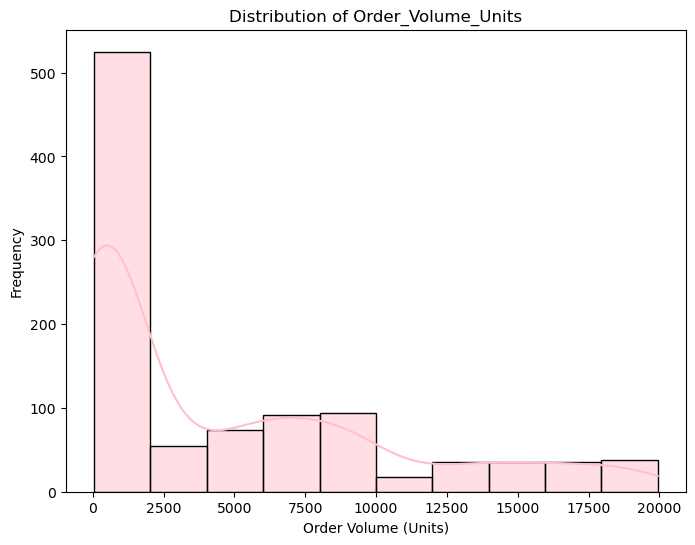

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Order_Volume_Units'], kde=True, bins=10, color='pink')
plt.title('Distribution of Order_Volume_Units')
plt.xlabel('Order Volume (Units)')
plt.ylabel('Frequency')
plt.show()

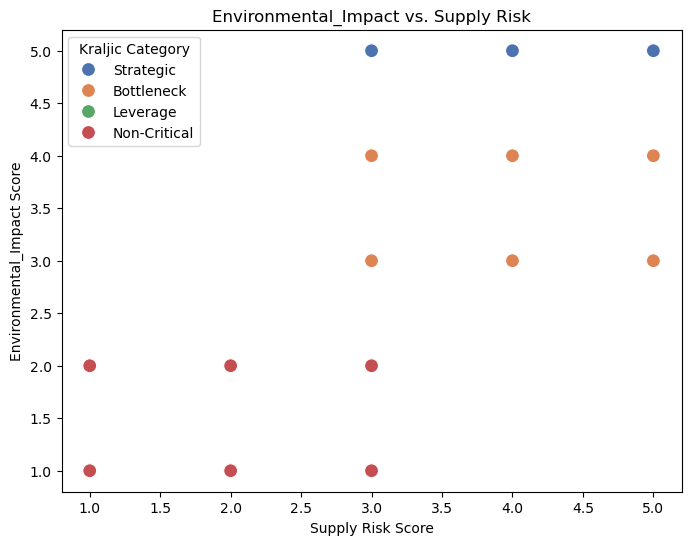

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Supply_Risk_Score', y='Environmental_Impact', data=df, hue='Kraljic_Category', palette='deep', s=100)
plt.title('Environmental_Impact vs. Supply Risk')
plt.xlabel('Supply Risk Score')
plt.ylabel('Environmental_Impact Score')
plt.legend(title='Kraljic Category')
plt.show()

C:\Users\NAGESH\AppData\Local\Temp\ipykernel_420\2511116991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Supplier_Region', y='Lead_Time_Days', palette='Set2')


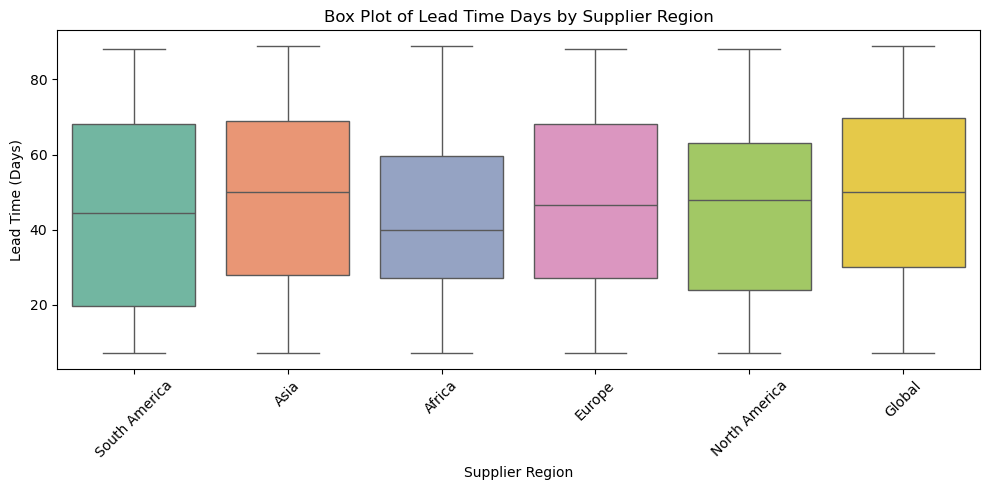

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Supplier_Region', y='Lead_Time_Days', palette='Set2')
plt.title('Box Plot of Lead Time Days by Supplier Region')
plt.xlabel('Supplier Region')
plt.ylabel('Lead Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

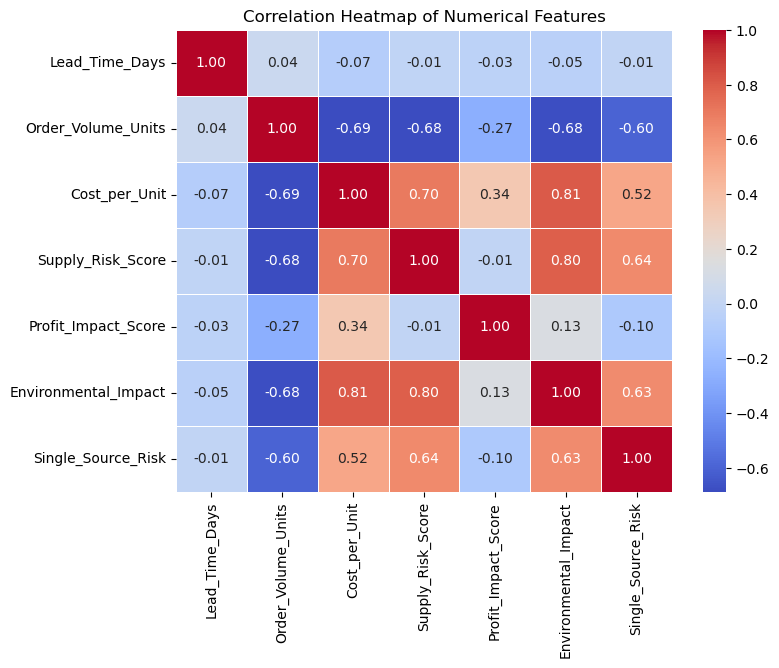

In [15]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


correlation_matrix = df[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

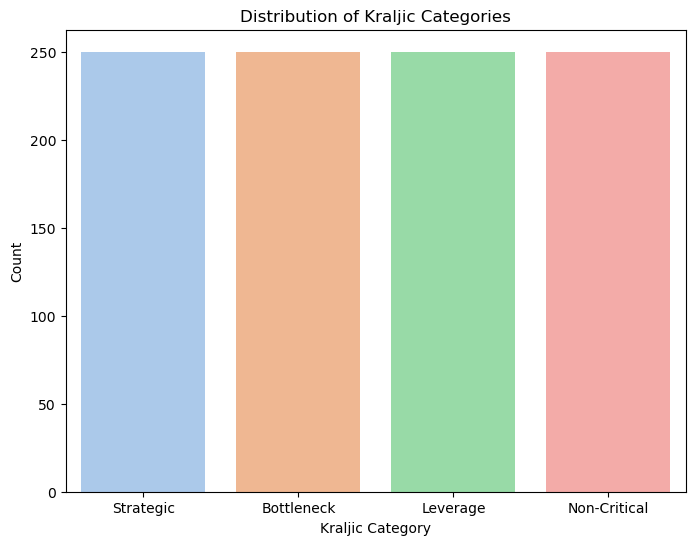

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Kraljic_Category', data=df, hue='Kraljic_Category', palette='pastel', legend=False)

plt.title('Distribution of Kraljic Categories')
plt.xlabel('Kraljic Category')
plt.ylabel('Count')
plt.show()

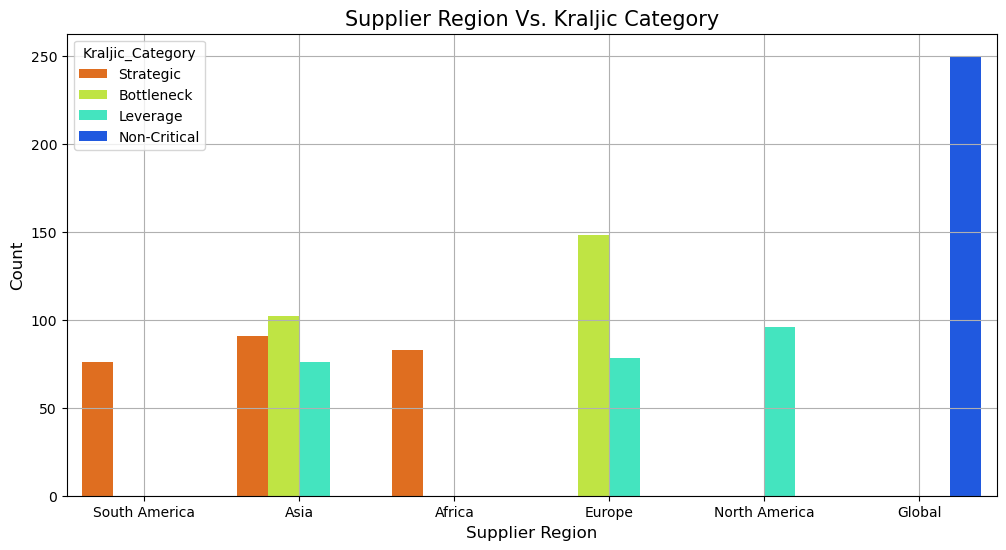

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Supplier_Region'], hue=df['Kraljic_Category'], palette='jet_r')
plt.title('Supplier Region Vs. Kraljic Category', fontsize=15)
plt.xlabel('Supplier Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid()
plt.show()

In [18]:
df.drop('Product_ID',axis=1, inplace=True)

In [19]:
encoder = LabelEncoder()
for i in ['Product_Name', 'Supplier_Region', 'Environmental_Impact','Kraljic_Category']:
    df[i] = encoder.fit_transform(df[i])

In [20]:
X = df.drop('Kraljic_Category', axis=1)
y = df['Kraljic_Category']

X_train,X_test, y_train,y_test = train_test_split(X,y , test_size=0.2)
print(f"X_train Shape: {X_train.shape}")
print(f"Y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (800, 9)
Y_train Shape: (800,)
X_test Shape: (200, 9)
y_test Shape: (200,)


In [21]:
X_train.dtypes



Product_Name              int32
Supplier_Region           int32
Lead_Time_Days            int64
Order_Volume_Units        int64
Cost_per_Unit           float64
Supply_Risk_Score         int64
Profit_Impact_Score       int64
Environmental_Impact      int64
Single_Source_Risk        int64
dtype: object

Random Forest Confusion Matrix:
[[40  0  0  0]
 [ 0 54  0  0]
 [ 0  0 49  0]
 [ 0  0  0 57]]


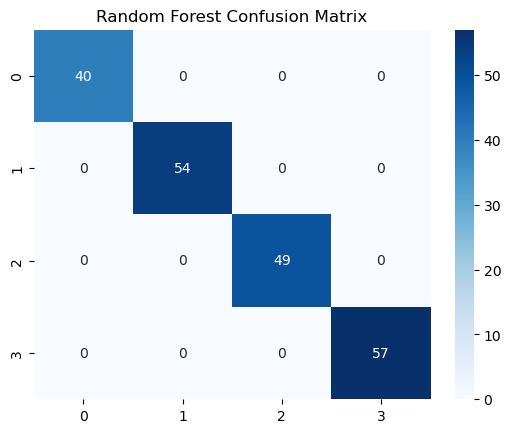

In [22]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

C:\Users\NAGESH\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


Logistic Regression Confusion Matrix:
[[40  0  0  0]
 [ 0 54  0  0]
 [ 0  0 49  0]
 [ 2  0  0 55]]


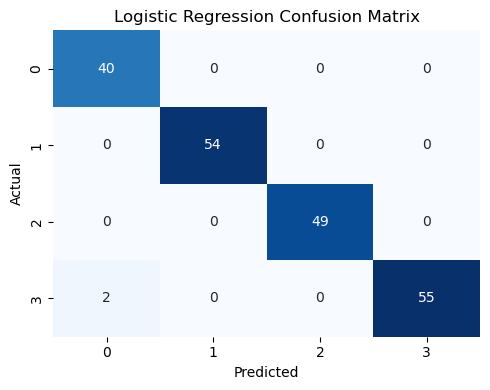


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        49
           3       1.00      0.96      0.98        57

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [23]:

log_reg_model = LogisticRegression(random_state=42, solver='liblinear')  # solver fixes convergence warnings
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_log_reg)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_log_reg, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))


Support Vector Classifier Confusion Matrix:
[[40  0  0  0]
 [ 0 49  1  4]
 [ 0 17 32  0]
 [25  0  0 32]]


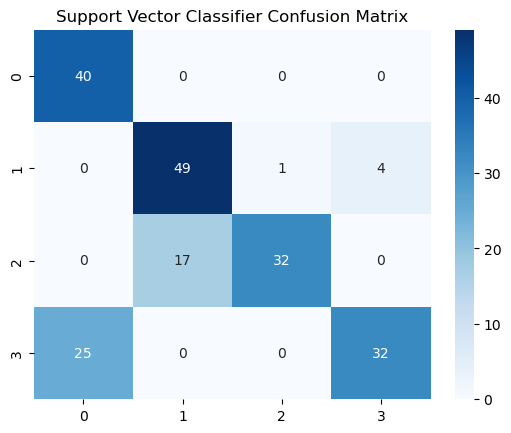

In [24]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

# Predict on test set
y_pred_svc = svc_model.predict(X_test)

# Confusion Matrix for SVC
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("Support Vector Classifier Confusion Matrix:")
print(conf_matrix_svc)
sns.heatmap(conf_matrix_svc, annot=True, cmap='Blues', fmt='d')
plt.title('Support Vector Classifier Confusion Matrix')
plt.show()

K-Nearest Neighbors Confusion Matrix:
[[39  0  0  1]
 [ 0 49  5  0]
 [ 0  8 41  0]
 [ 8  0  0 49]]


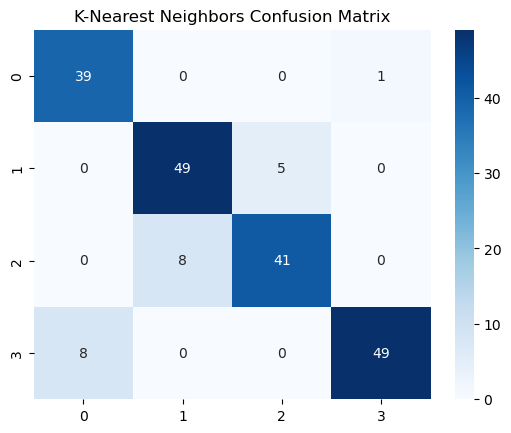

In [25]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn_model.predict(X_test)

# Confusion Matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("K-Nearest Neighbors Confusion Matrix:")
print(conf_matrix_knn)
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

In [26]:
# Print classification reports for each model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Support Vector Classifier Classification Report:")
print(classification_report(y_test, y_pred_svc))

print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        57

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        49
           3       1.00      0.96      0.98        57

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Support Vector Classifier Classification Report:
 

In [29]:
joblib.dump(rf_model, 'random_forest_model.joblib')

print("✅ Model saved successfully as 'random_forest_model.joblib'")

✅ Model saved successfully as 'random_forest_model.joblib'
